In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 100)

In [ ]:
# optional
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, stratify = y_train, random_state = 100)

In [8]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
71,6.1,2.8,4.0,1.3
90,5.5,2.6,4.4,1.2
4,5.0,3.6,1.4,0.2
17,5.1,3.5,1.4,0.3
18,5.7,3.8,1.7,0.3
...,...,...,...,...
26,5.0,3.4,1.6,0.4
69,5.6,2.5,3.9,1.1
103,6.3,2.9,5.6,1.8
65,6.7,3.1,4.4,1.4


In [9]:
# instantiate learning model k = 3
knn = KNeighborsClassifier(n_neighbors = 3) # 3NN

knn.fit(X_train, y_train) # fitting the model

KNeighborsClassifier(n_neighbors=3)

In [10]:
pred = knn.predict(X_test) # predict the response

In [11]:
pred

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
# To create a confusionn matrix
c = confusion_matrix(y_test, pred)
c

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]], dtype=int64)

In [13]:
accuracy = 43/45 * 100
print(accuracy)

95.55555555555556


In [15]:
# using cross-validation to choose optimal k
neighbors = list(range(1,50))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [17]:
len(cv_scores)

49

In [19]:
# changing to misclassification error (1 - accuracy)
error = [1 - x for x in cv_scores]

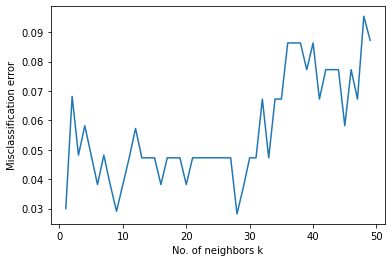

In [20]:
# plot misclassification error vs k
plt.plot(neighbors, error)
plt.xlabel("No. of neighbors k")
plt.ylabel("Misclassification error")
plt.show()

In [ ]:
# k = 1,9,28 is having least error
# apply model with k=1,9,28 on test data